# Nona lezione di laboratorio

In questa esercitazione è stato costruito un algoritmo genetico in C++ con lo scopo di risolvere numericamente il problema del commesso viaggiatore. Il numero di città che dovevano essere visitate erano 32 e questo algoritmo è stato applicato a due situazioni: le città erano punti estratti random su una circonferenza di raggio 1 oppure le città erano punti estratti con distribuzione di probabilità uniforme all'interno di un quadrato.

Nel primo caso, dato che una qualunque città può essere ruotata fino a coincidere con il punto $(1, 0)$, questo è stato assunto come città di partenza (e quindi anche di arrivo) del commesso viaggiatore. 
Nel secondo caso, dato che percorsi che presentano lo stesso ordine delle città anche se traslato sono interpretati come lo stesso percorso, allora la prima città estratta viene assunta come città di partenza (e quindi anche di arrivo) del commesso viaggiatore.
In tutta la trattazione successiva sarà sottinteso che la città di partenza non potrà subire variazioni.
D'ora in poi ci si riferirà ad un percorso come ad un organismo, e ad un insieme di organismi come ad una popolazione.

L'algoritmo costruisce una popolazione iniziale di $N=100$ organismi che sono stati diversificati (biodiversità di partenza). A questo punto l'esplorazione dei vari percorsi possibili direzionata verso l'organismo di lunghezza minore avviene come segue.
In analogia con l'evoluzione naturale, a partire dalla presente popolazione, viene costruita la successiva generazione. Gli organismi della popolazione vengono ordinati dal migliore (percorso più breve) al peggiore (percorso più lungo) e vengono estratte 50 coppie di organismi genitori con distribuzione di probabilità $P(i)=\frac{1}{2\sqrt{Ni}}$ dove $i$ indica l'i-esimo organismo della popolazione ordinata. Questa distribuzione di probabilità privilegia fortemente gli organismi migliori, che quindi avranno mediamente una prole più numerosa. Per campionare questa distribuzione di probabilità è stato utilizzato il metodo dell'inversione della cumulativa, che conduce ad ottenere $i$ come $int(N\text{rnd}^2)$ dove $\text{rnd} \in [0, 1)$. Ogni coppia di genitori genera una coppia di figli che sono con probabilità del $20\%$ identici ai genitori e con probabilità dell'$80\%$ subiscono crossover. Il crossover consiste concretamente nell'estrazione di un indice della sequenza genica e ogni figlio è identico a un genitore per la parte di sequenza genica precedente l'indice estratto. La seconda parte della sequenza genica viene invece completata con le città mancanti nell'ordine in cui compaiono nell'altro genitore.

Dopo aver ottenuto i due figli, questi hanno una probabilità pari al $10\%$ di subire ciascuna delle 5 mutazioni che sono state implementate.

La prima mutazione consiste nel semplice scambio di posto di due città all'interno della sequenza genica.
La seconda mutazione consiste nella scelta di una sottosequenza che viene poi ciclata in avanti di un certo numero nshift.
Esempio: sottosequenza selezionata da $B$ a $F$ e $\text{nshift}=2$, si ottiene

$[A, B, C, D, E, F] \, \rightarrow \, [A, E, F, B, C, D]$.

La terza mutazione consiste nella scelta di una sottosequenza che viene specchiata.
Esempio: sottosequenza selezionata da $B$ a $F$, si ottiene

$[A, B, C, D, E, F] \, \rightarrow \, [A, F, E, D, C, B]$.

La quarta mutazione consiste nella scelta di 2 sottosequenze che vengono scambiate.
Esempio: sottosequenza 1 selezionata da $B$ a $C$ e sottosequenza 2 selezionata da $E$ a $F$, si ottiene

$[A, B, C, D, E, F] \, \rightarrow \, [A, E, F, D, B, C]$.

La quinta mutazione consiste nella scelta di 2 sottosequenza che vengono scambiate, ma in ordine inverso.
Esempio: sottosequenza 1 selezionata da $A$ a $B$ e sottosequenza 2 selezionata da $E$ a $F$, si ottiene

$[A, B, C, D, E, F] \, \rightarrow \, [F, E, C, D, B, A]$.

La popolazione è stata lasciata evolvere con questo algoritmo per $1000$ generazioni e nei seguenti grafici è possibili vedere l'evoluzione al trascorrere del numero di generazioni della lunghezza dell'organismo migliore della popolazione nel caso di città sulla circonferenza. Nel caso di città all'interno del quadrato l'evoluzione è durata $5000$ generazioni.

Nel caso della circonferenza, il sistema raggiunge il percorso minimo dopo $280$ generazioni, mentre nel caso del quadrato, il sistema raggiunge il percorso minimo dopo $2525$ generazioni.

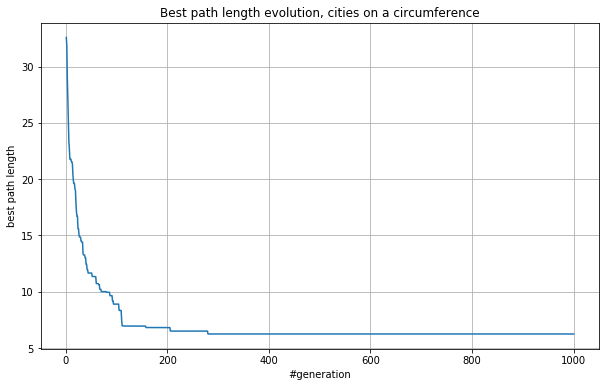

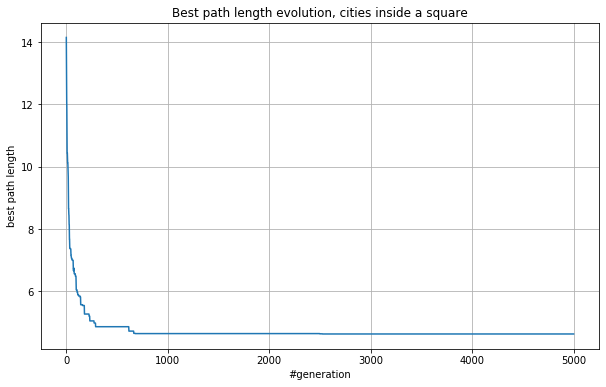

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

path1 = np.loadtxt("genetic_path_evolution_circumference.dat", usecols=(0), delimiter=' ', unpack='true')
generation1 = np.zeros(path1.size)
for i in range(generation1.size):
    generation1[i]=i+1

plt.figure(figsize=(10, 6))
plt.plot(generation1, path1)
plt.xlabel('#generation')
plt.ylabel('best path length')
plt.title('Best path length evolution, cities on a circumference')
plt.grid(True)

path2 = np.loadtxt("genetic_path_evolution_square.dat", usecols=(0), delimiter=' ', unpack='true')
generation2 = np.zeros(path2.size)
for i in range(generation2.size):
    generation2[i]=i+1

plt.figure(figsize=(10, 6))
plt.plot(generation2, path2)
plt.xlabel('#generation')
plt.ylabel('best path length')
plt.title('Best path length evolution, cities inside a square')
plt.grid(True)

plt.show()

Nei grafici sottostanti è rappresentato il percorso migliore che l'algoritmo è stato in grado di trovare sia nel caso di città sulla circonferenza, sia all'interno del quadrato.

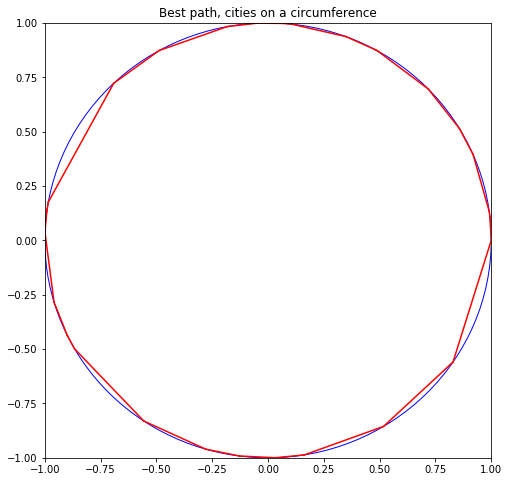

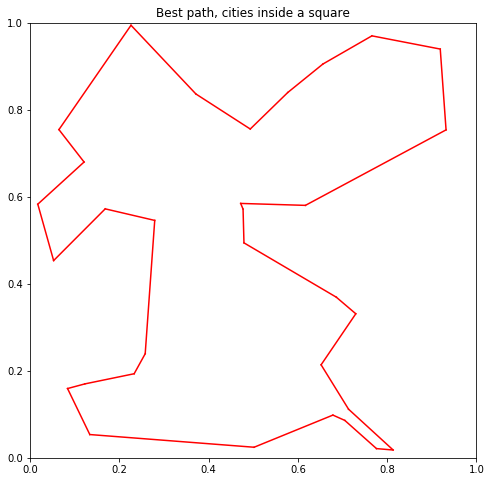

In [5]:
label1, x1, y1 = np.loadtxt("genetic_best_path_circumference.dat", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.figure(figsize=(8, 8))
plt.title('Best path, cities on a circumference')
for i in range(x1.size-1):
    plt.plot([x1[i], x1[i+1]], [y1[i], y1[i+1]], color='r')
plt.plot([x1[x1.size-1], x1[0]], [y1[y1.size-1], y1[0]], color='r')
circle=plt.Circle((0, 0), 1, color='b', fill=False)
ax = plt.gca()
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.add_artist(circle)


label2, x2, y2 = np.loadtxt("genetic_best_path_square.dat", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.figure(figsize=(8, 8))
plt.title('Best path, cities inside a square')
for i in range(x2.size-1):
    plt.plot([x2[i], x2[i+1]], [y2[i], y2[i+1]], color='r')
plt.plot([x2[x2.size-1], x2[0]], [y2[y2.size-1], y2[0]], color='r')
ax=plt.gca()
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

plt.show()